# **Projeto Final: Análise de Dados - Grupo 4**

DataSet "*Preços dos Carros no Brasil*".

## **Contextualização**

O grupo escolheu o dataset em questão por possuir afinidade com carros e também em uma análise específica, conhecer as oscilações de preços que estes enfretam, sendo essa última afirmação parte de uma hipótese futura.

Cerca de 600 mil carros foram colocados no documento a ser analisado. Os dados foram extraídos do site da FIPE, que atualiza mensalmente as informações, sendo necessário, representar a data que o dado foi obtido, variando de jan/2021 a jan/2023.

Cada linha da tabela representa um carro em específico, diferenciando-o por diversos fatores, como o ano e mês de referência, o tipo de combustível utilizado, o tipo de câmbio, o tamanho do motor, o código fipe, a marca e modelo e por fim, o preço médio que o carro é encontrado no Brasil, em reais.


## Variáveis
* *year_of_reference*: ano correspondente à data que o dado foi coletado. 
* *month_of_reference*: mês referente à data que o dado foi coletado.
* *fipe_code*: identificação utilizada para cada modelo de carro no site da FIPE.
* *authentication*: código que autentica a consulta no site da FIPE.
* *brand*: marca de cada carro nos dados.
* *model*: modelo de cada carro nos dados.
* *fuel*: tipo de combustível que o carro comporta (diesel ou gasolina)
* *gear*: tipo do câmbio de cada carro (automático ou manual); caso não esteja escrito 'Aut', assume-se que o carro em questão é necessariamente, manual.
* *engine_size*: tamanho do motor em centímetros cúbicos.
* *year_model*: corresponde à versão do modelo de cada carro analisado.
* *avg_price_brl*: média do preço do carro em reais, de acordo com a FIPE.

Em geral, as principais dificuldades foram encontradas nas colunas de *year_of_reference*/*month_of_reference* e *brand*. 

Para as primeiras variáveis citadas (ano e mês de referência), a dificuldade foi que um deles estava em string (mês) e outro em inteiro (ano), o que para um gráfico ficaria complicado colocar as datas em ordem crescente.

Para a outra variável (marca), haviam muitas (87), sendo complicado plotar em um gráfico de barras posteriormente.

## **Hipóteses**

Nosso objetivo é verificar se existe alguma conexão das variáveis nas relações, a partir de hipóteses formuladas pelo grupo:
* Tempo X Preço Médio (*year_of_reference*/*month_of_reference* X *avg_price_brl*): o preço médio aumenta conforme os meses, devido a inflação.
* Combustível X Tamanho do Motor (*fuel* X *engine_size*): motores maiores utilizam combustíveis mais caros e para automóveis que precisam de maior potência, isto é, em ordem decrescente de tamanho, diesel, gasolina e álcool.
* Marca X Preço Médio (*brand* X *avg_price_brl*): marcas de luxo possuem carros mais caros, e marcas populares possuem carros mais baratos.

A escolha foi baseada na intuição do grupo, ou seja, hipóteses nas quais existir uma relação era óbvio, conforme conhecimentos exteriores sobre carros.

Dentro do DataSet, a análise foi feita a partir de comparar dados das colunas que essas variáveis representavam, no entanto, dados da inflação foram retirados de fonte externa, pois não existiam dentro do DataSet em questão.

In [147]:
# Importando as Bibliotecas

%pip install pandas numpy pandas_datareader seaborn plotly matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.ticker as mticker


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Tratamento de Dados**

In [148]:
# Lendo o DataFrame e Analisando as Variáveis

df = pd.read_csv("fipe_cars.csv")

print(df.head(), df.dtypes, df.shape, sep="\n\n")

   year_of_reference month_of_reference fipe_code authentication  brand   
0               2021            January  038001-6     tlp4qry07m  Acura  \
1               2021            January  038001-6     s1wksdv9by  Acura   
2               2021            January  038001-6     skrbcfnkch  Acura   
3               2021            January  038001-6     rxzh76d5db  Acura   
4               2021            January  038001-6     qrm322tpd8  Acura   

     model      fuel    gear  engine_size  year_model  avg_price_brl  
0  NSX 3.0  Gasoline  manual          3.0        1995        40374.0  
1  NSX 3.0  Gasoline  manual          3.0        1994        38939.0  
2  NSX 3.0  Gasoline  manual          3.0        1993        37648.0  
3  NSX 3.0  Gasoline  manual          3.0        1992        35962.0  
4  NSX 3.0  Gasoline  manual          3.0        1991        32863.0  

year_of_reference       int64
month_of_reference     object
fipe_code              object
authentication         object
br

In [149]:
# Limpeza dos Dados

print(df.isna().sum())  # Não temos valores NaN!

df = df.drop(["fipe_code", "authentication", "gear", "year_model"], axis=1)  # Retirando as colunas desnecessárias para a nossa análise

df.head()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64


,year_of_reference,month_of_reference,brand,model,fuel,engine_size,avg_price_brl
0,2021,January,Acura,NSX 3.0,Gasoline,3.0,40374.0
1,2021,January,Acura,NSX 3.0,Gasoline,3.0,38939.0
2,2021,January,Acura,NSX 3.0,Gasoline,3.0,37648.0
3,2021,January,Acura,NSX 3.0,Gasoline,3.0,35962.0
4,2021,January,Acura,NSX 3.0,Gasoline,3.0,32863.0


In [150]:
# Identificando linhas duplicadas e eliminando-as

print(df.duplicated().sum())
df.loc[df.duplicated()]

4


,year_of_reference,month_of_reference,brand,model,fuel,engine_size,avg_price_brl
135875,2021,June,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,2.0,69893.0
215184,2021,October,GM - Chevrolet,A-10 2.5/4.1,Gasoline,2.5,8879.0
383231,2022,May,GM - Chevrolet,Monza Classic SE 2.0 /MPFI e EFI 2p e 4p,Gasoline,2.0,10655.0
559711,2022,December,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,3.0,64638.0


In [151]:
df = df.drop_duplicates()
print(df.duplicated().sum())
print(df.shape)

0
(599003, 7)


Como postulado na contextualização, o dataframe separava as colunas de ano e mês de referência, dificultando colocar as datas em ordem crescente. Para solucionar esse problema, as duas colunas foram unificadas para um tipo de variável datetime.

In [152]:
# Fundindo as colunas "year_of_reference" e "mounth_of_referece" como datas do tipo datetime

mapeamento = {'January': "1", 'February': "2",  'March': "3", 'April': "4", 'May': "5", 'June':
              "6", 'July': "7", 'August': "8", 'September': "9", 'October': "10", 'November': "11", 'December': "12"}

df["month_of_reference"] = df["month_of_reference"].map(mapeamento)  # Transformando as strings do mês com o número correspondente

df["year_of_reference"] = df["year_of_reference"].astype(str)  # Transformando os anos em strings

df["date"] = df["month_of_reference"].str.cat(df["year_of_reference"], sep="/")  # Juntando os valores no formato de data

df["date"] = pd.to_datetime(df["date"], format="%m/%Y").dt.strftime('%Y/%m')  # Transformando em datetime

df = df.drop(columns=["month_of_reference", "year_of_reference"])  # Retirando as colunas que usamos

df

,brand,model,fuel,engine_size,avg_price_brl,date
0,Acura,NSX 3.0,Gasoline,3.0,40374.0,2021/01
1,Acura,NSX 3.0,Gasoline,3.0,38939.0,2021/01
2,Acura,NSX 3.0,Gasoline,3.0,37648.0,2021/01
3,Acura,NSX 3.0,Gasoline,3.0,35962.0,2021/01
4,Acura,NSX 3.0,Gasoline,3.0,32863.0,2021/01
...,...,...,...,...,...,...
599002,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,22790.0,2023/01
599003,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,22169.0,2023/01
599004,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,21565.0,2023/01
599005,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,20978.0,2023/01


## **Visualização de Dados**

### *Tempo x Preço Médio*

#### Gráfico do Preço Médio pelo Tempo:

Com o objetivo de ver o crescimento dos preços conforme os meses, utilizou-se um gráfico de dispersão, que compara duas variáveis quantitativas.

Primeiramente, agrupou-se o dataframe por data e posteriormente obteve-se a média dos preços para cada período analisado.

Para melhor identificação do modelo de crescimento dos preços, foi feito uma reta de regressão linear.

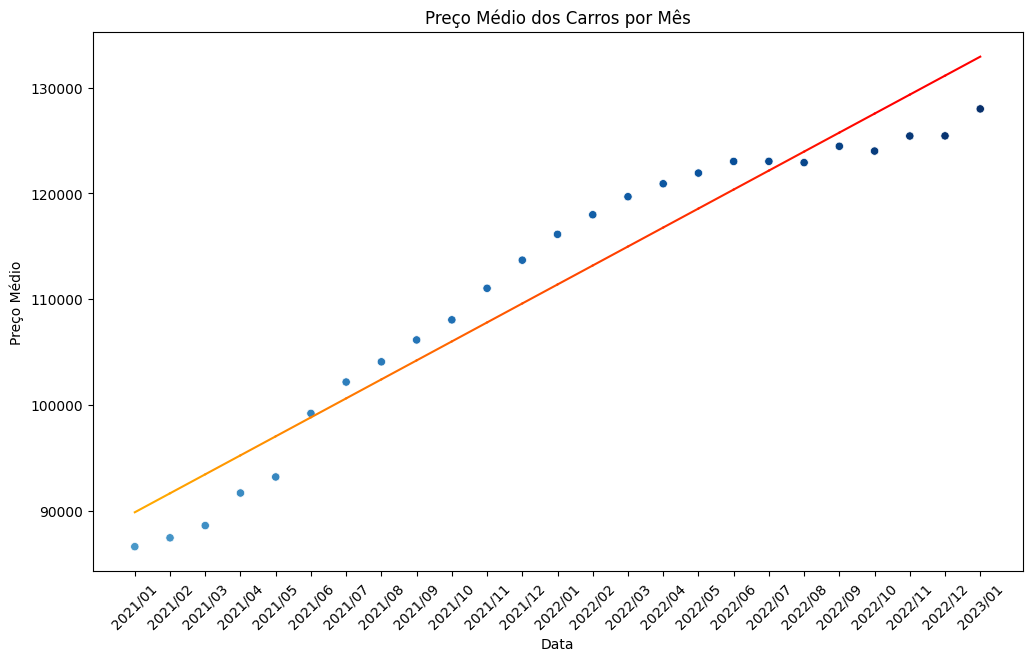

In [153]:
medias_data = df.groupby("date")["avg_price_brl"].mean()  # Agrupando por data

datas = df["date"].unique()  # Todas as datas distintas do período

valores = np.arange(25)

cores_dispersao = plt.colormaps["Blues"](np.linspace(0.6, 1, 25))  # Escolha das cores para dispersão
cmap_dispersao = mcolors.ListedColormap(cores_dispersao)

coeficientes = np.polyfit(valores, medias_data, 1)
regressao = np.polyval(coeficientes, valores)  # Criação da reta de regressão linear
indices_particoes = np.linspace(0, 24, 26, dtype=int) 

plt.figure(figsize=(12, 7))
sns.scatterplot(x=datas, y=medias_data, c=valores, cmap=cmap_dispersao)
for i in range(25):  # Cortando a reta de regressão em partes e colorindo cada um gradualmente
    segmento_x = valores[indices_particoes[i]:indices_particoes[i+1]+1]
    segmento_y = regressao[indices_particoes[i]:indices_particoes[i+1]+1]
    cor = plt.colormaps["autumn"]((-i+22)/32)
    plt.plot(segmento_x, segmento_y, color=cor)

plt.title("Preço Médio dos Carros por Mês")
plt.ylabel("Preço Médio")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.show()

#### Conclusão:

Vemos o crescimento dos preços ao longo dos anos, confirmando nossa primeira hipótese.
Observa-se que, embora haja uma tendência de crescimento conforme os meses, entre 2022/05 e 2022/10 houveram algumas oscilações, em que preços tiveram menores em datas posteriores do que em datas anteriores.

#### Comparando os preços médios com outros indicadores:

Para verificar a dimensão do crescimento dos preços, comparamos com o IPCA e com o preço médio do barril de petróleo.

In [154]:
# Os dados são do IBGE: https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=series-historicas


# Leitura e Limpeza do DataFrame de IPCA
ipca = pd.read_excel("ipca_mensal.xlsx")
ipca = ipca.drop(columns=["Variação mensal durante o Plano Real", "Unnamed: 1"])
ipca.columns = ipca.iloc[0]
ipca = ipca.drop([0, 1, 3, 4])
ipca.iloc[0] = ipca.iloc[0].str.replace(',', '.').astype(float)
ipca.index = ["IPCA"]
ipca = ipca.loc[:, "janeiro 2021":"janeiro 2023"]
ipca

,janeiro 2021,fevereiro 2021,março 2021,abril 2021,maio 2021,junho 2021,julho 2021,agosto 2021,setembro 2021,outubro 2021,...,abril 2022,maio 2022,junho 2022,julho 2022,agosto 2022,setembro 2022,outubro 2022,novembro 2022,dezembro 2022,janeiro 2023
IPCA,0.25,0.86,0.93,0.31,0.83,0.53,0.96,0.87,1.16,1.25,...,1.06,0.47,0.67,-0.68,-0.36,-0.29,0.59,0.41,0.62,0.53


In [155]:
# Os dados são do site Index Mundi: https://www.indexmundi.com/pt/pre%c3%a7os-de-mercado/?mercadoria=petr%c3%b3leo-bruto-brent&meses=60

# Leitura e Limpeza do DataFrame do Petróleo
petroleo = pd.read_excel("petroleo.xlsx")
petroleo = petroleo.drop(columns=["Mês", "Preço"])
petroleo = petroleo.iloc[31:56].T
petroleo.columns = ipca.columns
petroleo

,janeiro 2021,fevereiro 2021,março 2021,abril 2021,maio 2021,junho 2021,julho 2021,agosto 2021,setembro 2021,outubro 2021,...,abril 2022,maio 2022,junho 2022,julho 2022,agosto 2022,setembro 2022,outubro 2022,novembro 2022,dezembro 2022,janeiro 2023
Taxa de variação,0.0938,0.1358,0.0521,-0.0064,0.0505,0.0739,0.0181,-0.0587,0.0654,0.1213,...,-0.0849,0.0623,0.0686,-0.0929,-0.0947,-0.0856,0.0329,-0.0221,-0.1117,0.0271


In [156]:
ipca_acumulado = ipca.loc["IPCA"].cumsum().astype(float)  # Tornando os indicadores acumulados
petroleo_acumulado = ((petroleo.loc["Taxa de variação"].cumsum() - petroleo.iloc[0, 0])*100).astype(float)
preco_perc = pd.Series((medias_data - medias_data[0])*100/(medias_data[0]))
preco_perc.index = ipca_acumulado.index

df_comparacoes = pd.concat([ipca_acumulado, preco_perc, petroleo_acumulado], axis=1)  # Juntando todos em um único DataFrame
df_comparacoes.columns = ["IPCA", "Preço dos Carros", "Petróleo"]

cores1 = [px.colors.qualitative.Dark2[0], px.colors.qualitative.Light24[19], 
         px.colors.qualitative.G10[5]]  # Escolha de cores

fig = px.line(df_comparacoes, x=df_comparacoes.index, y=df_comparacoes.columns, 
                line_shape="spline", markers=True, color_discrete_sequence=cores1)  # Faz o gráfico de linha de todos os indicadores

markers = ["diamond", "hexagon", "square"]  # Escolha dos marcadores para cada indicador
i = 0 
for d in fig.data:
    d.marker.symbol = markers[i]
    d.marker.size = 7
    i += 1

fig.update_layout(title='Evolução Percentual dos Indicadores', title_x=0.5, xaxis_title='Data',
                  yaxis_title='%', width=900, height=600,
                  legend_title="Indicador")
fig.update_xaxes(tickangle=50)

fig.show()

#### Conclusão:

Vemos que a taxa de crescimento do preço médio dos carros foi bem superior ao IPCA, com mais de 47% de aumento no fim do período.
Além disso, apesar das altas e baixas do preço do petróleo, não se vê ondulação parecidas na curva de preços médios, levando a acreditar que a preferência por carros econômicos nesses períodos não foram o suficiente para impactar nos preços médios.

### *Combustível x Tamanho do Motor*

#### Gráfico da Proporção de Combustíveis no Total:

In [157]:
df_combustivel = pd.DataFrame()
df_combustivel["Combustível"] = df["fuel"].unique()  # Separando os tipos de combustíveis
df_combustivel["Frequência"] = np.array(df["fuel"].value_counts())  # Frequência Absoluta com que aparecem

cores2 = [px.colors.qualitative.Plotly[0], px.colors.qualitative.Plotly[1], 
         px.colors.qualitative.D3[2]]  # Seleção das cores

fig = px.pie(df_combustivel, values = "Frequência", names = "Combustível", 
            title="Proporção de Combustíveis no DataSet", template="presentation", 
            color_discrete_sequence=cores2)  # Plot do gráfico de setor
fig.update_layout(width=800, height=500)
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()

#### Como fica a proporção ao longo do tempo?

Outra questão gerada na análise, afinal, as preferências de combustível podem variar com o tempo.

In [158]:
proporcoes = df.groupby(["date", "fuel"]).size() / df.groupby("date").size()  # Tomando a frequência relativa
df_proporcoes = proporcoes.unstack(level='fuel').reset_index()
fig = px.bar(df_proporcoes, "date", ["Gasoline", "Diesel", "Alcohol"], 
             title="Proporção de Combustíveis ao Longo do Tempo", color_discrete_sequence=cores2,
             labels={"value": "Proporção", "date": "Data", "variable": "Combustível"})  # Plotando o gráfico de barras
fig.update_layout(width=800, height=500, title_x=0.5)
fig.update_xaxes(tickangle=50)
fig.show()


#### Conclusão:

Praticamente não houve variação na proporção de combustíveis usados ao longo do tempo. Entendemos que, como não surgiram novas marcas no dataset, e as marcas analisadas, mesmo com novos modelos, sempre mantém a proporção de combustível, a proporção total também não se alterou.

#### Relação entre Combustível usado e Tamanho do Motor:

Um questionamento que surgiu durante a observação do dataset, será que o tipo de combustível utilizado, influencia no tamanho do motor?

In [159]:
df_combustivel["Tamanho do Motor"] = np.flip(np.array(df.groupby("fuel")["engine_size"].mean()))  # Pegando a média do tamanho do motor para cada tipo de combustível
fig = px.bar(df_combustivel, "Combustível", "Tamanho do Motor", title="Média do Tamanho do Motor (cm³)", color="Combustível", color_discrete_sequence=cores2)  # Plotando o gráfico de barras
fig.update_layout(width=800, height=500, showlegend=False, title_x=0.5)
fig.show()

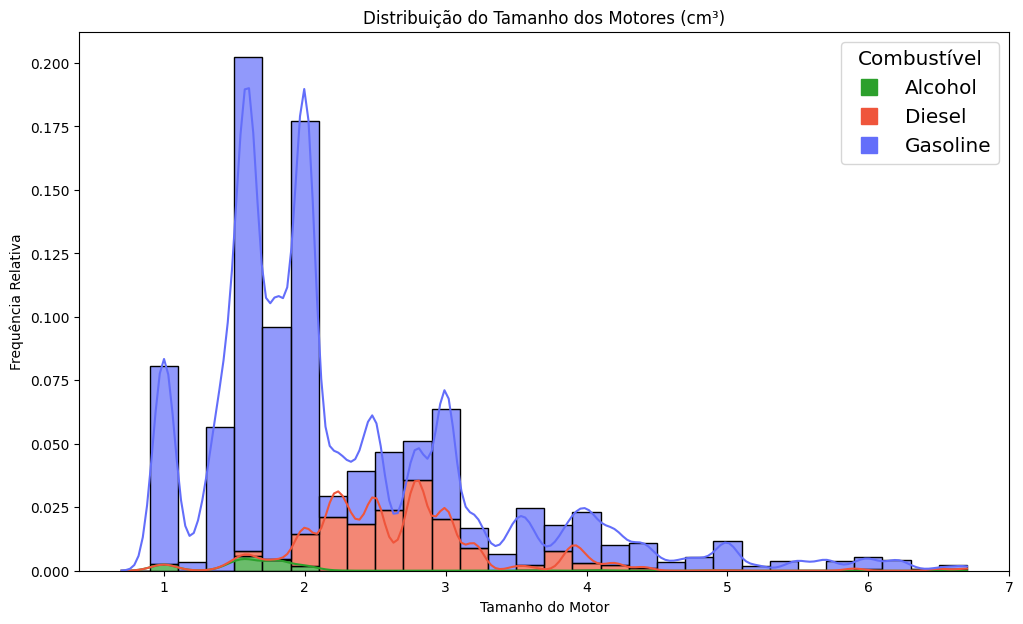

In [160]:
plt.figure(figsize=(12, 7))
sns.histplot(df, x="engine_size", bins=30, hue="fuel", stat="probability", multiple="stack",
             palette=cores2, alpha=0.7, kde=True)  # Fazendo o histograma dos combustíveis

plt.title("Distribuição do Tamanho dos Motores (cm³)")
plt.ylabel("Frequência Relativa")
plt.xlabel("Tamanho do Motor")

Alcohol = mlines.Line2D([], [], color=px.colors.qualitative.D3[2], marker='s', linestyle='None',
                        markersize=12, label='Alcohol')
Diesel = mlines.Line2D([], [], color=px.colors.qualitative.Plotly[1], marker='s', linestyle='None',
                       markersize=12, label='Diesel')
Gasoline = mlines.Line2D([], [], color=px.colors.qualitative.Plotly[0], marker='s',
                         linestyle='None', markersize=12, label='Gasoline')

plt.legend(handles=[Alcohol, Diesel, Gasoline], title="Combustível", title_fontsize="x-large",
           fontsize="x-large")
plt.show()

#### Conclusão:

Concluímos que existe uma relação entre o tipo de combustível utilizado e o tamanho do motor, sendo os motores a diesel os maiores e os a álcool menores. Pesquisando sobre, associamos isso a 3 motivos principais:

* Eficiência térmica: Motores a diesel possuem maior eficiência térmica em comparação com motores a álcool, ou seja, esses motores convertem uma maior proporção de energia térmica do combustível em trabalho mecânico, resultando em maior potência e torque para um dado tamanho de motor, quando comparado com o a álcool.
* Torque: Os motores a diesel geralmente produzem mais torque em baixas rotações do que os motores a álcool. Isso é importante para aplicações que requerem força de tração em baixas velocidades, como veículos utilitários e caminhões.
* Combustão: A combustão nos motores a diesel é controlada por compressão, enquanto nos motores a álcool é controlada por ignição por faísca. A combustão por compressão nos motores a diesel permite taxas de compressão mais altas, o que resulta em maior eficiência, maior potência e, portanto, necessidade de mais volume. 


## *Marcas Famosas x Preço Médio*

#### Comparando os Preços Médios das Marcas Famosas:

Escolhendo as 10 marcas mais conhecidas, decidimos fazer uma comparação de seus preços, em busca de disparidades.
A escolha levou em conta além da marca ser conhecida, deixar entre as 10 tanto marcas de luxo quanto populares, para que houvesse alguma diferença de preço significativa.

In [173]:
marcas = np.array(['BMW', 'Ferrari', 'Ford', 'GM - Chevrolet', 'Honda', 'Jeep', 'Mclaren', 'Mercedes-Benz', 'Toyota', 'VW - VolksWagen'])  # Definindo as 10 marcas mais conhecidas

dfm = df[df['brand'].isin(marcas)]  # Tomando a parte do DataFrame referente às marcas escolhidas

df_marcas = pd.DataFrame()
df_marcas['Marca'] = marcas
df_marcas['Preço Médio'] = list(dfm.groupby('brand')['avg_price_brl'].mean())  # Média dos preços
df_marcas["Modelos"] = list(dfm.groupby("brand")["model"].nunique())  # Quantidade de modelos diferentes por marca

fig = sp.make_subplots(rows=1, cols=2)

indices_ordenados1 = df_marcas["Preço Médio"].sort_values(ascending=False).index
fig.add_trace(go.Bar(x=df_marcas["Marca"].iloc[indices_ordenados1], y=df_marcas["Preço Médio"].
                     sort_values(ascending=False), 
                     name="Preço Médio", marker_color=px.colors.qualitative.Alphabet[0]), row=1, col=1)  # Gráficos de barras decrescentes

indices_ordenados2 = df_marcas["Modelos"].sort_values(ascending=False).index
fig.add_trace(go.Bar(x=df_marcas["Marca"].iloc[indices_ordenados2], y=df_marcas["Modelos"].
                     sort_values(ascending=False), 
                     name="Quantidade de Modelos", marker_color=px.colors.qualitative.Bold[8]), row=1, col=2)

fig.update_layout(title_text="Marcas Famosas", title_x=0.5, 
                  title_font=dict(size=20, color="black"), showlegend=False,annotations=[dict(x=0.12, y=1.1, xref='paper', yref='paper', text='Preço Médio por Marca (Milhões de Reais)', showarrow=False, font=dict(size=15)), 
                  dict(x=0.88, y=1.1, xref='paper', yref='paper', text='Quantidade de Modelos Diferentes por Marca', showarrow=False)], font=dict(size=15))
fig.update_xaxes(tickangle=40)

fig.show()

#### Conclusão e Nova Motivação:

Como esperado, as marcas de luxo possuem um preço médio muito elevado comparado com as demais. Além disso, observamos através do gráfico de quantidade de modelos que parece ter uma correlação negativa com os preços, ou seja, marcas com maior variedade de modelos tendem a ter preços mais baixos, possivelmente porque as marcas com mais modelos são justamente aquelas que produzem carros "populares". O que nos leva à nova análise.

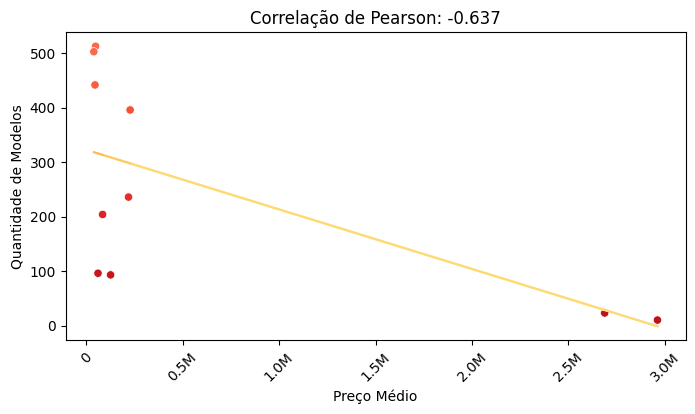

In [162]:
cores_dispersao = plt.colormaps["Reds"](np.linspace(0.8, 0.5, 10))  # Escolhendo novas cores
cmap_dispersao = mcolors.ListedColormap(cores_dispersao)

coeficientes = np.polyfit(df_marcas["Preço Médio"], df_marcas["Modelos"], 1)
regressao = np.polyval(coeficientes, df_marcas["Preço Médio"])  # Criando a reta de regressão linear
indices_particoes = np.linspace(0, 9, 11, dtype=int)

plt.figure(figsize=(8, 4))
fig1 = sns.scatterplot(x=df_marcas["Preço Médio"], y=df_marcas["Modelos"], 
                c=df_marcas["Modelos"], cmap=cmap_dispersao)  # Plotando o gráfico de dispersão

for i in range(10):  # Fazendo a reta de regressão com gradiente de cores
    segmento_x = df_marcas["Preço Médio"][indices_particoes[i]:indices_particoes[i+1]+1]
    segmento_y = regressao[indices_particoes[i]:indices_particoes[i+1]+1]
    cor = plt.colormaps["YlOrRd"]((i-2)/20)
    plt.plot(segmento_x, segmento_y, color=cor)

corr1 = df_marcas["Preço Médio"].corr(df_marcas["Modelos"])  # Calculando a correlação

def format_millions1(x, pos): 
    if x == 0:
        return f"0"
    return f"{x/1e6:.1f}M"

# Formatação dos eixos x e y
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_millions1))  # Formatando o eixo X para Milhões

plt.title(f"Correlação de Pearson: {round(corr1, 3)}")
plt.ylabel("Quantidade de Modelos")
plt.xlabel("Preço Médio")
plt.xticks(rotation=45)
plt.show()

#### Conclusão e Novo Gráfico:

Vemos que a nossa hipótese tinha sentido, já que uma correlação de -0.637 é considerada moderada. Apesar disso, vemos que as 2 marcas de luxo entre as 10 selecionadas funcionaram como outliers, por isso tentaremos de novo sem elas.

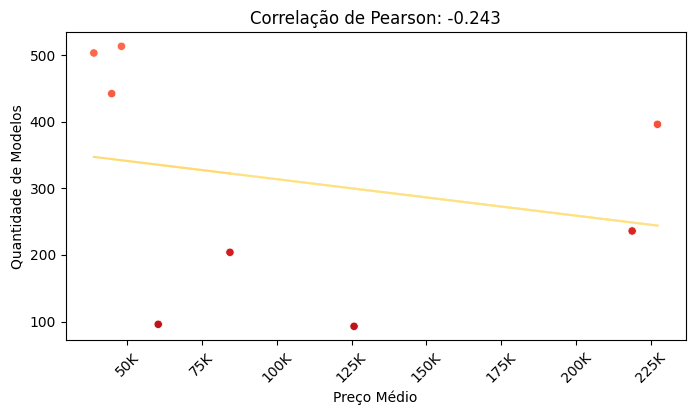

In [163]:
df_sem_luxo = df_marcas[~df_marcas["Marca"].isin(["Ferrari", "Mclaren"])]  # Retirando as marcas de luxo

cores_dispersao = plt.colormaps["Reds"](np.linspace(0.8, 0.5, 10))
cmap_dispersao = mcolors.ListedColormap(cores_dispersao)

coeficientes = np.polyfit(df_sem_luxo["Preço Médio"], df_sem_luxo["Modelos"], 1)
regressao = np.polyval(coeficientes, df_sem_luxo["Preço Médio"])
indices_particoes = np.linspace(0, 7, 9, dtype=int)

plt.figure(figsize=(8, 4))
fig1 = sns.scatterplot(x=df_sem_luxo["Preço Médio"], y=df_sem_luxo["Modelos"], 
                c=df_sem_luxo["Modelos"], cmap=cmap_dispersao)

for i in range(8):
    segmento_x = df_sem_luxo["Preço Médio"][indices_particoes[i]:indices_particoes[i+1]+1]
    segmento_y = regressao[indices_particoes[i]:indices_particoes[i+1]+1]
    cor = plt.colormaps["YlOrRd"]((i-2)/20)
    plt.plot(segmento_x, segmento_y, color=cor)

corr2 = df_sem_luxo["Preço Médio"].corr(df_sem_luxo["Modelos"])  # -0.243 -> Fraca

def format_millions2(x, pos):
    if x == 0:
        return f"0"
    return f"{x/1e3:.0f}K"

# Formatação dos eixos x e y
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_millions2))

plt.title(f"Correlação de Pearson: {round(corr2, 3)}")
plt.ylabel("Quantidade de Modelos")
plt.xlabel("Preço Médio")
plt.xticks(rotation=45)
plt.show()

#### Conclusão:

Sem as marcas de luxo vemos que a correlação diminui bastante, -0.243 é considerada uma correlação fraca, ainda assim, confirmamos que a quantidade de modelos de cada marca tem relação inversa com o seu preço médio. 

#### Comparando a Proporção de Combustíveis e o Tamanho Médio dos Motores para as Marcas Famosas:

In [177]:
df_marcas["Tamanho Médio dos Motores"] = list(dfm.groupby("brand")["engine_size"].mean())  # Tamanho médio do motor por marca

fig = sp.make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(x=df_marcas["Marca"], y=df_marcas["Tamanho Médio dos Motores"], 
                     name="Tamanho Médio dos Motores", marker_color=px.colors.qualitative.D3[9], showlegend=False), row=1, col=1)  # Gráficos de barras

proporcoes = dfm.groupby(["brand", "fuel"]).size() / dfm.groupby("brand").size()  # Calculando as proporções para cada marca
df_proporcoes = proporcoes.unstack(level='fuel').reset_index().fillna(0)

fig_prop = px.bar(df_proporcoes, "brand", ["Gasoline", "Diesel", "Alcohol"],
                  color_discrete_sequence=cores2)  # Criando o gráfico de barras

for combu in fig_prop.data:  # Adicionando no gráfico principal
    fig.add_trace(combu, row=1, col=2)

fig.update_layout(title_text="Marcas Famosas", title_x=0.5, 
                  title_font=dict(size=20, color="black"), annotations=[dict(x=0.12, y=1.1, xref='paper', yref='paper', text='Tamanho Médio dos Motores (cm³)', showarrow=False, font=dict(size=15)), 
                  dict(x=0.88, y=1.1, xref='paper', yref='paper', text='Proporção de Combustíveis por Marca', showarrow=False)], font=dict(size=15), barmode="stack")
fig.update_xaxes(tickangle=40)

fig.show()

#### Conclusão:

Vemos que as 2 marcas com os maiores motores utilizam somente gasolina como combustível...

#### Modelos mais Caros X Modelos mais Baratos:

Optamos por comparar também os 5 modelos mais baratos e mais caros de cada data, procurando diferenças em evolução de preço e marcas.

In [165]:
df_ordenado = df.sort_values(["date", "avg_price_brl"])  # Ordenando por data e por preço
df_barato = pd.DataFrame()
for data in df_ordenado["date"].unique():  # Escolhendo somente os modelos únicos em cada data (por algum motivo temos o mesmo modelo contabilizado 2x em alguns meses)
    df_data_atual = df_ordenado[df_ordenado['date'] == data]
    modelos_unicos = df_data_atual.drop_duplicates(subset='model').head(5)
    df_barato = pd.concat([df_barato, modelos_unicos])
df_barato.drop("fuel", axis=1)

,brand,model,engine_size,avg_price_brl,date
12187,Lada,Laika 1.5,1.5,1699.0,2021/01
12174,Lada,Laika 1.6,1.6,1868.0,2021/01
12185,Lada,Samara 1.3/ 1.5,1.3,1936.0,2021/01
7996,Ford,Del Rey L 1.8 / 1.6 2p e 4p,1.8,2091.0,2021/01
5952,Fiat,Uno Furgão 1.5/ 1.3,1.5,2175.0,2021/01
...,...,...,...,...,...
587319,Lada,Laika 1.5,1.5,1985.0,2023/01
587317,Lada,Samara 1.3/ 1.5,1.3,2174.0,2023/01
575742,Baby,Buggy 1.6 2-Lug.,1.6,2436.0,2023/01
580778,Fiat,Uno Furgão 1.5/ 1.3,1.5,2503.0,2023/01


In [166]:
df_marca_barato = pd.DataFrame(df_barato.groupby("brand").count()["model"])  # Frequencia absoluta das marcas com os carros mais baratos
df_marca_barato["%"] = (df_marca_barato["model"] / 125) * 100
df_marca_barato

,model,%
brand,,
Baby,10,8.0
Fiat,25,20.0
Ford,25,20.0
Lada,65,52.0


Vemos aqui que essas 4 marcas são as responsaveis pela confecção dos modelos mais baratos do Brasil, em especial a *Lada* que fabrica mais da metade desses modelos.

In [167]:
df_caro = pd.DataFrame()
for data in df_ordenado["date"].unique():  # O mesmo para os carros mais caros
    df_data_atual = df_ordenado[df_ordenado['date'] == data]
    modelos_unicos = df_data_atual.drop_duplicates(subset='model').tail(5)
    df_caro = pd.concat([df_caro, modelos_unicos])
df_caro.drop("fuel", axis=1)

,brand,model,engine_size,avg_price_brl,date
13088,Mclaren,720S Spider 4.0 Bi-Turbo V8 2p,4.0,2990633.0,2021/01
5664,Ferrari,488 Pista 3.9 V8 720cv,3.9,3025120.0,2021/01
5666,Ferrari,F8 TRIBUTO 3.9 V8 720cv,3.9,3025493.0,2021/01
5661,Ferrari,488 Pista Spider 3.9 V8 720cv,3.9,3712050.0,2021/01
5668,Ferrari,F8 Spider 3.9 V8 Bi-Turbo 720cv,3.9,3965203.0,2021/01
...,...,...,...,...,...
580484,Ferrari,812 GTS 6.5 V12 800cv,6.5,6215167.0,2023/01
588321,Mclaren,765LT Coupe 4.0 Bi-Turbo V8,4.0,6242309.0,2023/01
594330,Rolls-Royce,Ghost 6.7 V12 Aut.,6.7,6439900.0,2023/01
580480,Ferrari,SF 90 STRADALE 4.0 V8 Bi-Turbo (Híbrido),4.0,6610265.0,2023/01


In [168]:
df_marca_caro = pd.DataFrame(df_caro.groupby("brand").count()["model"])  # Contando a quantidade de modelos de cada marca no novo DataFrame
df_marca_caro["%"] = (df_marca_caro["model"] / 125) * 100
df_marca_caro

,model,%
brand,,
Ferrari,69,55.2
Mclaren,25,20.0
Rolls-Royce,31,24.8


Como esperado, as marcas com os modelos mais caros são as marcas de luxo, em especial a *Ferrari*, uma das mais conhecidas do mundo.

In [169]:
medias_baratos = df_barato.groupby("date").mean("avg_price_brl")  # Tomando a média dos preços
medias_caros = df_caro.groupby("date").mean("avg_price_brl")

preco_perc_barato = pd.Series((medias_baratos["avg_price_brl"] - medias_baratos["avg_price_brl"][0])*100/(medias_baratos["avg_price_brl"][0]))  # Transformando em porcentagem para termos um bom comparativo
preco_perc_barato.index = ipca_acumulado.index

preco_perc_caro = pd.Series((medias_caros["avg_price_brl"] - medias_caros["avg_price_brl"][0])*100/(medias_caros["avg_price_brl"][0]))
preco_perc_caro.index = ipca_acumulado.index

df_comparacoes = pd.concat([ipca_acumulado, preco_perc_barato, preco_perc_caro], axis=1)  # Juntando em um único DataFrame
df_comparacoes.columns = ["IPCA", "Carros Baratos", "Carros Caros"]

cores3 = [px.colors.qualitative.G10[5], px.colors.qualitative.Dark2[4], 
         px.colors.qualitative.D3[3]]  # Escolhendo outras cores

fig = px.line(df_comparacoes, x=df_comparacoes.index, y=df_comparacoes.columns, 
                line_shape="spline", markers=True, color_discrete_sequence=cores3)  # Plotando o gráfico

markers = ["pentagon", "circle", "hexagram"]  # Selecionando novos marcadores
i = 0 
for d in fig.data:
    d.marker.symbol = markers[i]
    d.marker.size = 7
    i += 1

fig.update_layout(title='Evolução Percentual dos Preços', title_x=0.5, xaxis_title='Data',
                  yaxis_title='%', width=900, height=600,
                  legend_title="Indicador")
fig.update_xaxes(tickangle=50)

fig.show()

#### Conclusão:

Vemos que o preço médio dos carros mais baratos praticamente acompanhou a inflação, se mantendo como carros populares, enquanto o dos carros mais caros teve um grande salto com um aumento de mais de 100% em 2 anos.

#### Preço Médio e Tamanho do Motor:

Observando os novos data frames com os carros mais caros e mais baratos, vimos que o tamanho médio dos motores dos carros baratos se manteve o mesmo em todo o período, enquanto dos mais caros aumentou consideravelmente. Disso veio uma pergunta: será que o tamanho do motor influencia no valor do carro?

In [170]:
teste = df_barato.groupby("date").mean("avg_price_brl")
corr1 = teste["engine_size"].corr(teste["avg_price_brl"])  # Calculando a correlação entre o preço médio por data com o tamanho do motor
corr1

nan

Por não ter alteração no tamanho médio, dizemos que o preço dos carros baratos possui covariância 0 com o tamanho do motor, se considerarmos uma distribuição normal dos dados, implica que são independentes.

In [171]:
teste = df_caro.groupby("date").mean("avg_price_brl")
corr2 = teste["engine_size"].corr(teste["avg_price_brl"])
corr2

0.8074777649554381

Já para os carros de luxo, temos uma correlação aproximada de 0.81 considerada positiva forte, indicando que, nesses carros, o tamanho do motor influencia muito em seu preço final, provavelmente associado a outros fatores como potência e velocidade máxima.

## **Conclusão geral**

Todas as hipóteses escolhidas foram apontadas como verdadeiras. Em suma, o preço médio dos carros aumentou conforme a variação do IPCA conforme os meses. Motores maiores utilizam diesel de preferência, porém maior parte das marcas do DataSet tinham gasolina como principal, além da distribuição de combustíveis não variar conforme o tempo. Marcas de luxo possuem carros mais caros e menos modelos, o contrário também ocorre. O crescimento percentual de preço dos carros mais baratos cresce acompanhando o IPCA, em contrapartida, carros mais caros duplicaram seus preços no período.

A partir da análise mostrada anteriormente, abre-se uma gama de possibilidade de análises futuras, como criar novos tipos de filtragem para selecionar outras 10 marcas para serem utilizadas na terceira hipótese, afetando na correlação observada entre preço médio e quantidade de modelos.